In [2]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/ig5sufew/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'val1')
    # scatter(pred_val2_df, doubled_val2_df, 'val2')
    scatter(pred_val3_df, doubled_val3_df, 'val3')

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlabel(f'True Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of True Values')
    plt.show()

def ploth():
    # histogram(pred_val1_df, 'val1')
    # histogram(val2_df, 'val2')
    histogram(val3_df, 'val3')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)



In [45]:
# ploth()
# plotscatter()
correlate()
# wilcox()

Pearson correlation coefficient for all: 0.5572, p-value: 0
Spearman correlation coefficient for all: 0.4153, p-value: 0
Pearson correlation coefficient for val2: 0.2924, p-value: 8.46e-11
Spearman correlation coefficient for val2: 0.2800, p-value: 5.512e-10
Pearson correlation coefficient for val3: 0.2314, p-value: 9.125e-15
Spearman correlation coefficient for val3: 0.2184, p-value: 2.777e-13


In [23]:
pred_val3_df

,0
16146,1.397601
16147,1.672404
16148,1.463267
16149,1.342847
16150,1.270329
...,...
17235,2.057439
17236,2.186362
17237,2.245770
17238,0.549699


In [24]:
val3_df

0      1.489948
1      1.560012
2      1.564679
3      1.609160
4      1.617679
         ...   
542    3.392102
543    3.404234
544    3.469201
545    3.494095
546    3.527422
Name: 4, Length: 547, dtype: float64

In [37]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/bazc1enn/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    scatter(pred_val1_df, doubled_val1_df, 'val1')
    scatter(pred_val2_df, doubled_val2_df, 'val2')
    scatter(pred_val3_df, doubled_val3_df, 'val3')

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlabel(f'predicted Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of predicted Values')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'val1')
    histogram(pred_val2_df, 'val2')
    histogram(pred_val3_df, 'val3')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)



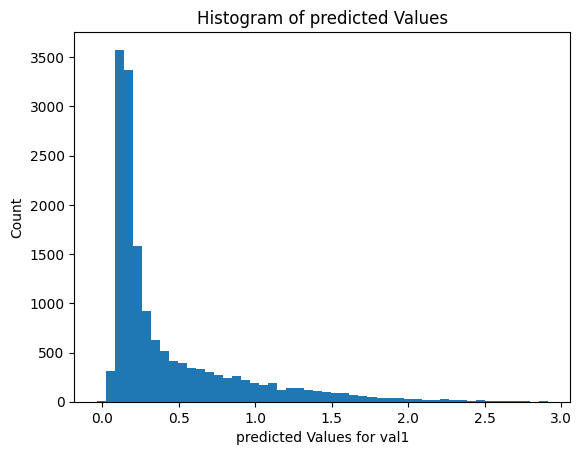

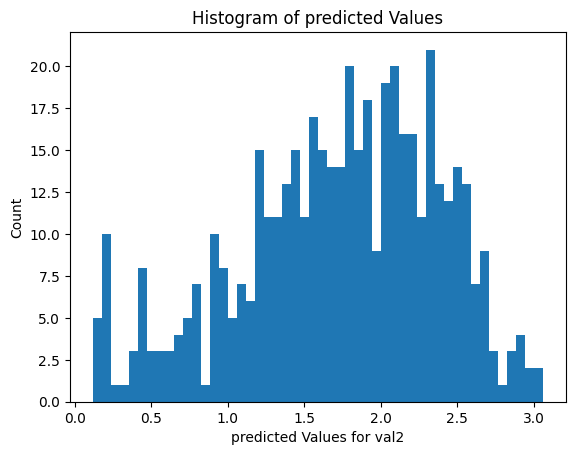

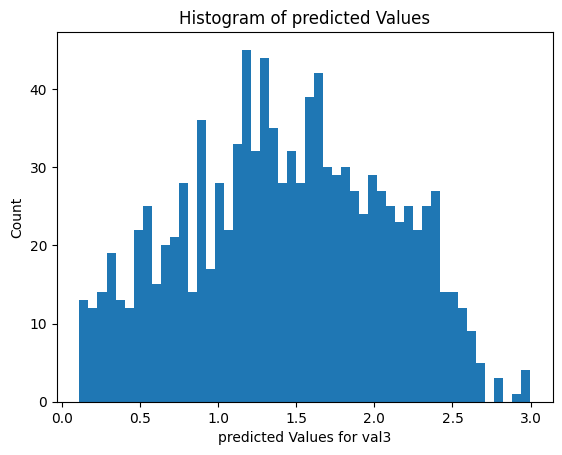

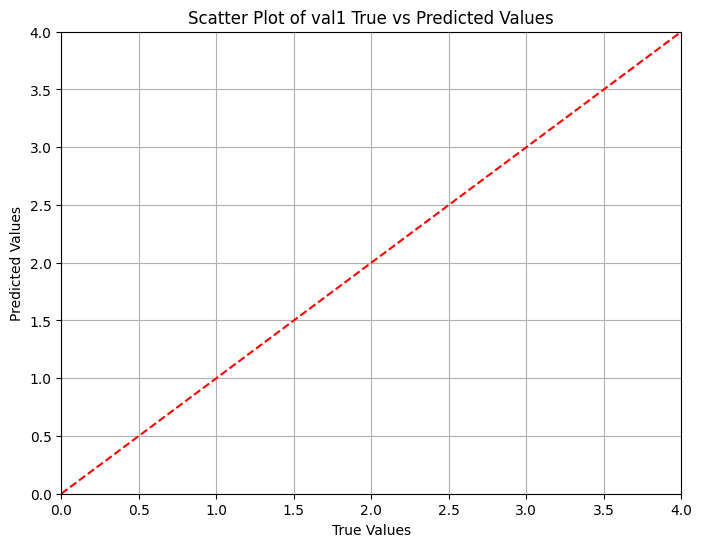

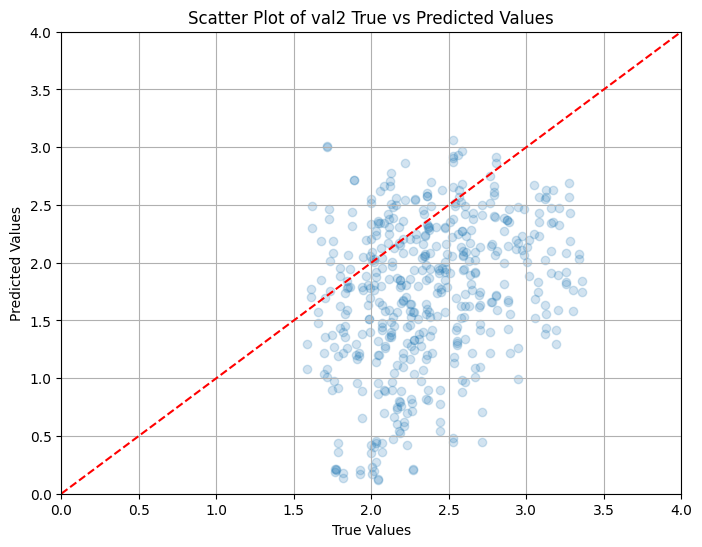

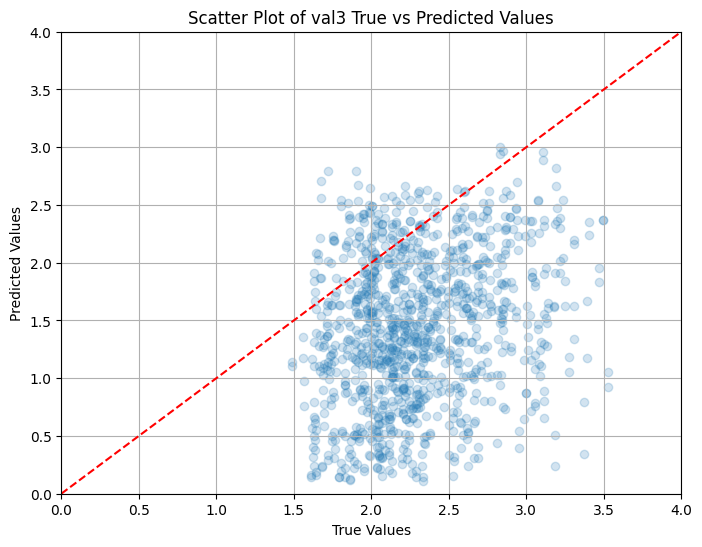

Pearson correlation coefficient for all: 0.5588, p-value: 0
Spearman correlation coefficient for all: 0.4108, p-value: 0
Pearson correlation coefficient for val2: 0.3045, p-value: 1.251e-11
Spearman correlation coefficient for val2: 0.2996, p-value: 2.762e-11
Pearson correlation coefficient for val3: 0.2326, p-value: 6.57e-15
Spearman correlation coefficient for val3: 0.2179, p-value: 3.167e-13
Wilcoxon Rank-Sum Test:
Test Statistic: [-32.22681392]
P-value: [7.43413861e-228]
There is a significant difference between the two distributions (reject null hypothesis).
Wilcoxon Rank-Sum Test:
Test Statistic: [-44.44579704]
P-value: [0.]
There is a significant difference between the two distributions (reject null hypothesis).


In [38]:
ploth()
plotscatter()
correlate()
wilcox()

In [43]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/6tkqtebx/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    scatter(pred_val1_df, doubled_val1_df, 'val1')
    scatter(pred_val2_df, doubled_val2_df, 'val2')
    scatter(pred_val3_df, doubled_val3_df, 'val3')

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlabel(f'predicted Values for {name}')
    plt.ylabel('Count')
    plt.xlim(0, 4)
    plt.title(f'Histogram of predicted Values')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'val1')
    histogram(pred_val2_df, 'val2')
    histogram(pred_val3_df, 'val3')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)



In [41]:
# ploth()
# plotscatter()
correlate()
# wilcox()

Pearson correlation coefficient for all: 0.5524, p-value: 0
Spearman correlation coefficient for all: 0.4147, p-value: 0
Pearson correlation coefficient for val2: 0.2726, p-value: 1.606e-09
Spearman correlation coefficient for val2: 0.2700, p-value: 2.318e-09
Pearson correlation coefficient for val3: 0.2714, p-value: 6.232e-20
Spearman correlation coefficient for val3: 0.2486, p-value: 7.157e-17


In [4]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/bazc1enn/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlabel(f'predicted Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of predicted Values')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'val1')
    histogram(pred_val2_df, 'val2')
    histogram(pred_val3_df, 'val3')

def plotscatter():
    scatter(pred_val1_df, doubled_val1_df, 'val1')
    scatter(pred_val2_df, doubled_val2_df, 'val2')
    scatter(pred_val3_df, doubled_val3_df, 'val3')


Pearson correlation coefficient for all: 0.3922, p-value: 0
Spearman correlation coefficient for all: 0.3295, p-value: 0
Pearson correlation coefficient for val2: 0.2120, p-value: 1.408e-09
Spearman correlation coefficient for val2: 0.1882, p-value: 8.204e-08
Pearson correlation coefficient for val3: 0.3518, p-value: 4.638e-39
Spearman correlation coefficient for val3: 0.3531, p-value: 2.375e-39


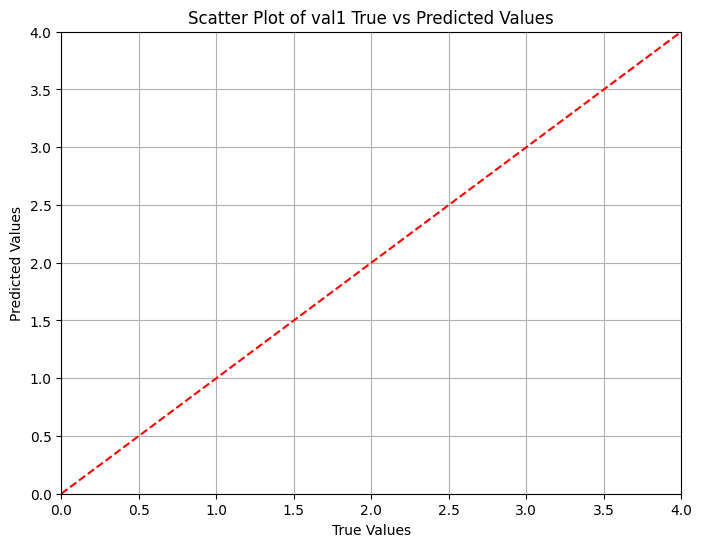

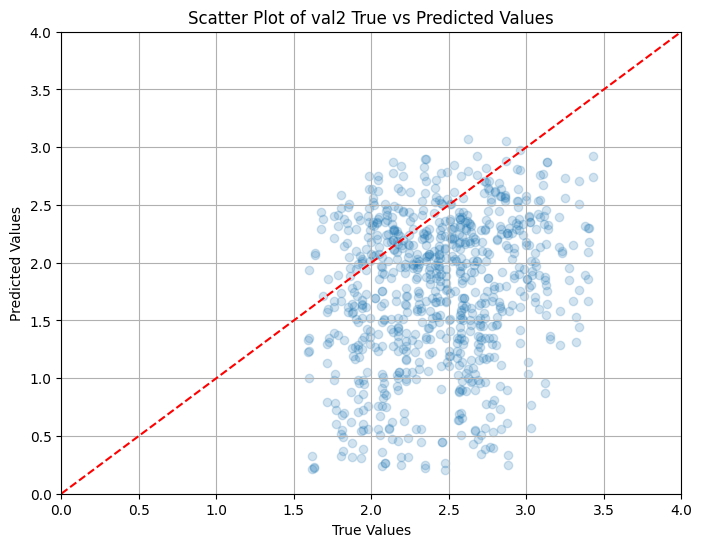

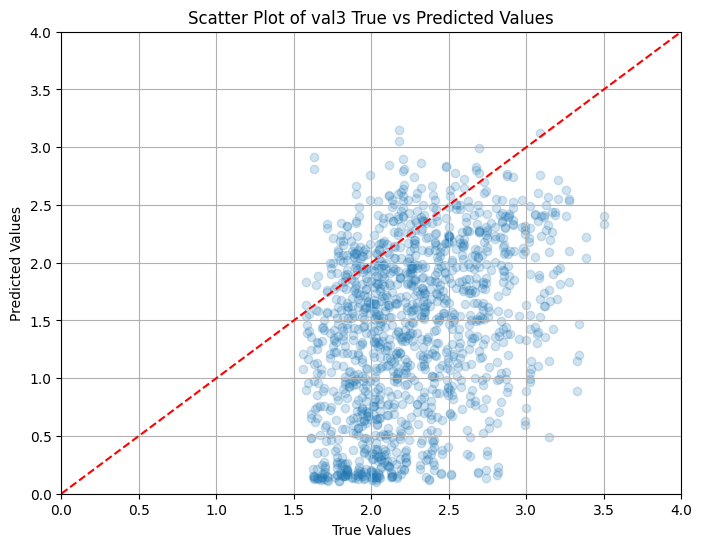

In [5]:
correlate()
plotscatter()
# ploth()
# histogram(val1_df, 'val1')
# histogram(val2_df, 'val2')
# histogram(val3_df, 'val3')

In [5]:
pred_df = pd.read_csv('../model_outputs/6tkqtebx/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

In [6]:
correlate()

Pearson correlation coefficient for all: 0.3815, p-value: 0
Spearman correlation coefficient for all: 0.3293, p-value: 0
Pearson correlation coefficient for val2: 0.2202, p-value: 3.053e-10
Spearman correlation coefficient for val2: 0.1802, p-value: 2.867e-07
Pearson correlation coefficient for val3: 0.3667, p-value: 1.559e-42
Spearman correlation coefficient for val3: 0.3666, p-value: 1.666e-42


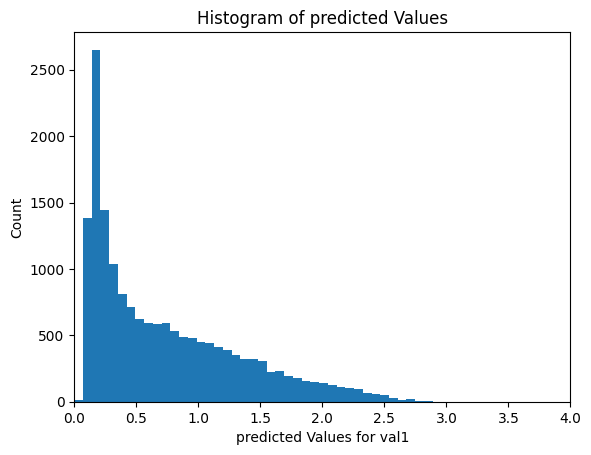

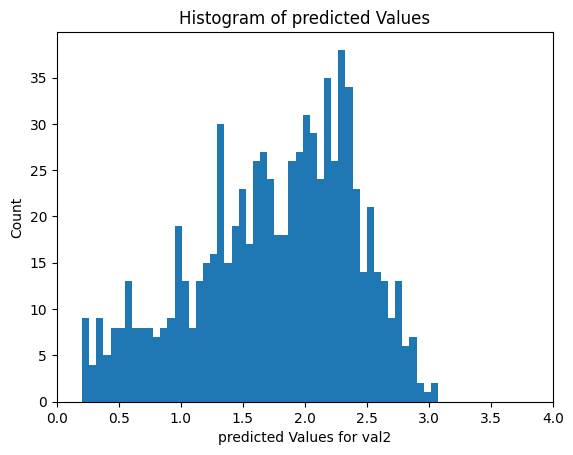

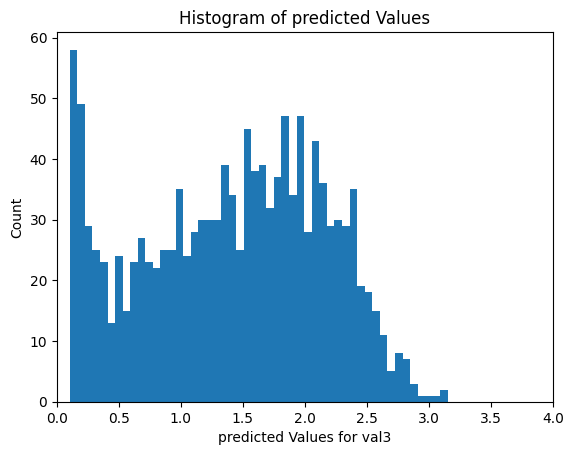

In [27]:
ploth()


In [21]:
pred_df = pd.read_csv('../model_outputs/1c8n0ubm/activations_cow_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/old_val2/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/old_val3/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlabel(f'Pred Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of pred Values')
    plt.show()
    
def ploth():
    histogram(pred_val1_df, 'val1')
    histogram(pred_val2_df, 'val2')
    histogram(pred_val3_df, 'val3')

Pearson correlation coefficient for all: 0.4632, p-value: 0
Spearman correlation coefficient for all: 0.3310, p-value: 0
Pearson correlation coefficient for val2: 0.5384, p-value: 1.918e-19
Spearman correlation coefficient for val2: 0.5582, p-value: 4.6e-21
Pearson correlation coefficient for val3: 0.2248, p-value: 1.566e-10
Spearman correlation coefficient for val3: 0.2221, p-value: 2.625e-10


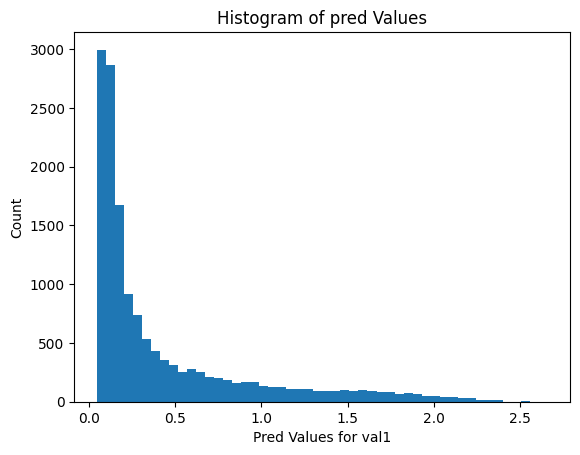

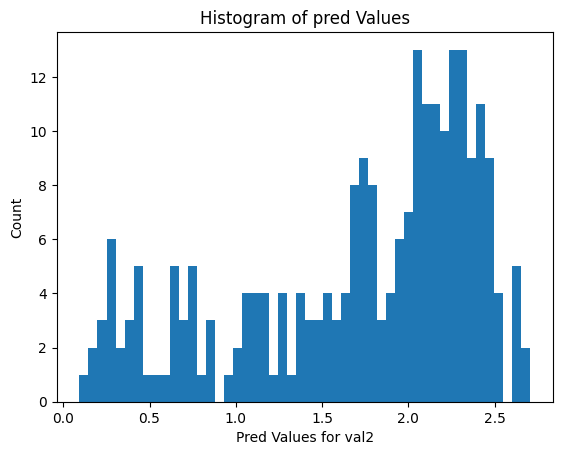

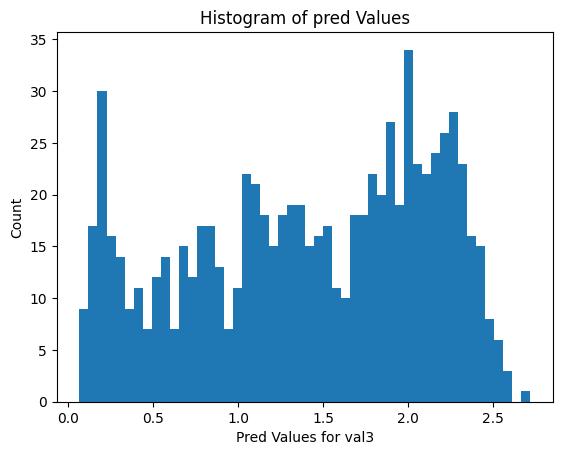

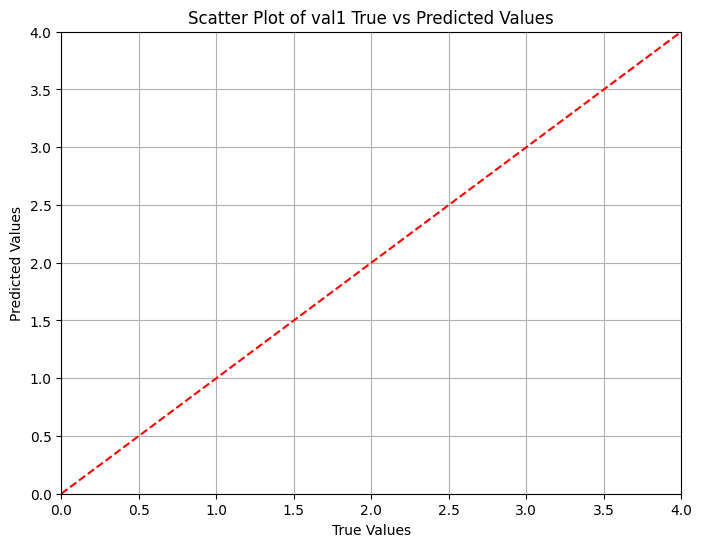

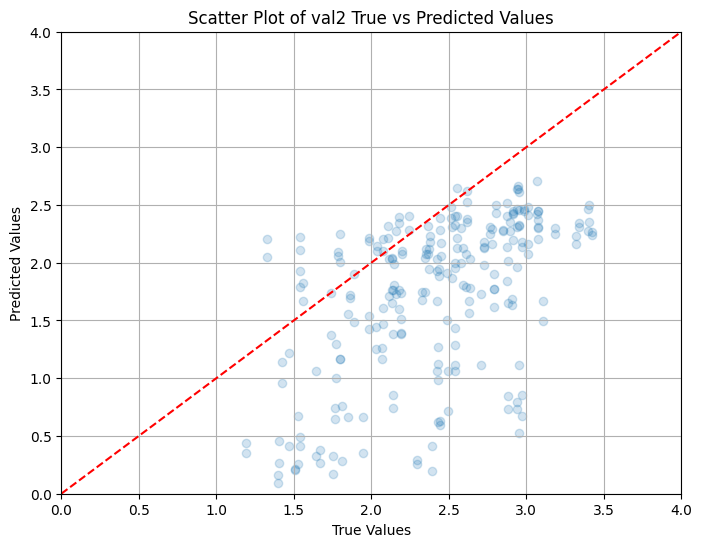

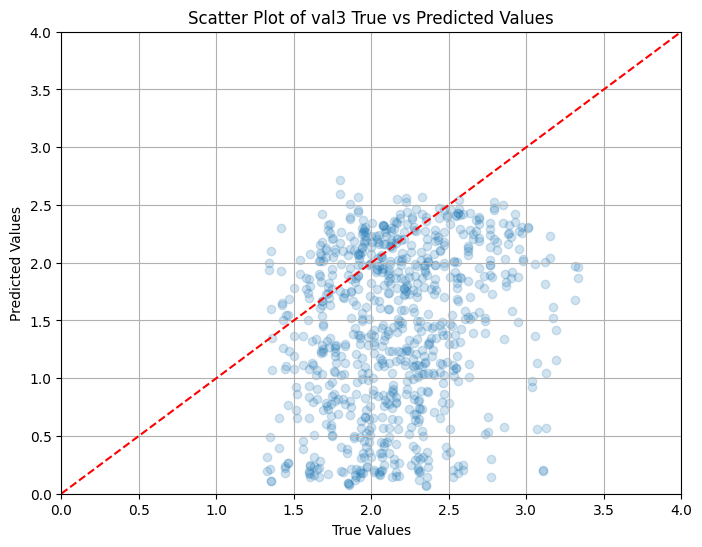

In [22]:
correlate()
ploth()
plotscatter()